In [1]:
# 1. Email Spam Detection using TF-IDF + Logistic Regression
# Task: Classify emails as spam or ham using TF-IDF and logistic regression.
emails = [
    ("Win a FREE trip now!", "spam"),
    ("Please review the attached report", "ham"),
    ("Congratulations, you have won a lottery!", "spam"),
    ("Meeting scheduled at 10 AM tomorrow", "ham"),
    ("Free coupons waiting for you", "spam")
]
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
texts, labels = zip(*emails)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

model = LogisticRegression()
model.fit(X, labels)

# Predict a new message
test = ["Get free cash now!"]
X_test = vectorizer.transform(test)
print("Prediction:", model.predict(X_test)[0])


Prediction: spam


In [3]:
# 2. News Classification using CountVectorizer
# Task: Classify news into politics or sports.
news_data = [
    ("The prime minister addressed the nation.", "politics"),
    ("The team won the cricket match yesterday.", "sports"),
    ("New laws were introduced in the parliament.", "politics"),
    ("Football tournament starts next week.", "sports"),
    ("Government announces new tax reforms.", "politics"),
    ("The opposition leader criticized the budget plan.", "politics"),
    ("India defeated Australia in the final match.", "sports"),
    ("The president signed the healthcare bill.", "politics"),
    ("Tennis champion wins her sixth Grand Slam title.", "sports"),
    ("Cabinet approves new education policy.", "politics"),
    ("The hockey league season begins tomorrow.", "sports"),
    ("Parliament passes the environmental protection act.", "politics"),
    ("The coach announced the final team squad.", "sports"),
    ("Elections to be held in five states next month.", "politics"),
    ("Star player scores a hat-trick in the football match.", "sports"),
    ("Supreme Court hears plea on a on recent ordinance.", "politics")]


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

texts, labels = zip(*news_data)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

model = MultinomialNB()
model.fit(X, labels)

# Test
test = ["India wins the world cup!"]
X_test = vectorizer.transform(test)
print("Predicted category:", model.predict(X_test)[0])



Predicted category: sports


In [4]:
# 3. Product Review Sentiment using VADER
# Task: Perform sentiment analysis on product reviews.
reviews = [
    "Absolutely love this product, it works like a charm!",
    "Worst experience ever. Will never buy again.",
    "It's okay, not great but not bad either.",
    "Very satisfied with the quality!",
    "Disappointed. It stopped working in a week."
]
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
for review in reviews:
    score = sia.polarity_scores(review)
    sentiment = 'positive' if score['compound'] > 0 else 'negative'
    print(f"{review} → {sentiment} (score: {score['compound']})")


Absolutely love this product, it works like a charm! → positive (score: 0.8746)
Worst experience ever. Will never buy again. → negative (score: -0.6249)
It's okay, not great but not bad either. → positive (score: 0.4728)
Very satisfied with the quality! → positive (score: 0.5244)
Disappointed. It stopped working in a week. → negative (score: -0.6124)


[nltk_data] Downloading package vader_lexicon to C:\Users\BALAJI
[nltk_data]     MURUGAN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# 4. Topic Modeling on Articles using LDA
# Task: Extract 2 topics from a list of article contents.
docs = [
    "Deep learning models can process images and videos.",
    "Neural networks are at the core of deep learning.",
    "Global warming affects the climate and ecosystems.",
    "Carbon emissions cause climate change.",
    "Convolutional neural networks perform well in vision tasks."
]
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(docs)

lda = LatentDirichletAllocation(n_components=2, random_state=0)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[-5:]])


Topic #1:
['affects', 'global', 'ecosystems', 'warming', 'climate']
Topic #2:
['videos', 'networks', 'neural', 'deep', 'learning']


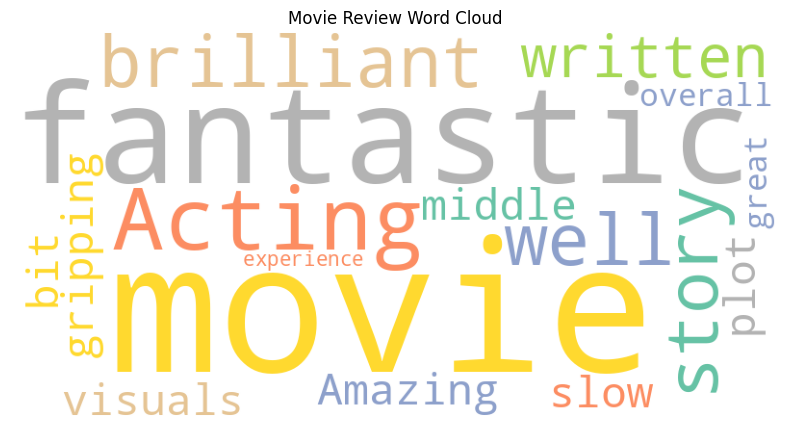

In [29]:
#  5. Word Cloud for Movie Reviews
# Task: Visualize frequently used words in movie reviews.
movie_reviews = """
The movie was fantastic! Acting was brilliant and the story was well-written.
Amazing visuals and a gripping plot.
It was a bit slow in the middle, but overall a great movie experience.
"""
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(movie_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud.to_image())
plt.axis("off")
plt.title("Movie Review Word Cloud")
plt.show()

